In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [28]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [35]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
# svc = svm.SVC(kernel='linear', C=1,gamma=0.1).fit(X, y)
svc = svm.SVC(kernel='rbf', C=1,gamma=10).fit(X, y)

In [36]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

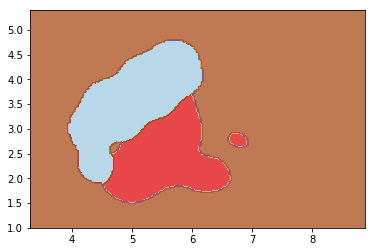

In [37]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

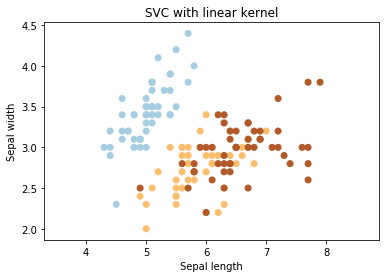

In [33]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [50]:
import numpy as np
import pandas as pd

training_data_fp= "datasets/housing/major_project/TrainingFeatures.json"
train_data= pd.read_json(training_data_fp,lines=True)

big_list1=[]
big_list2=[]

for i in range(0,48101,1):
    local_list=[]
    local_list.append(train_data["text_length"][i])
    local_list.append(train_data["char_count"][i])
    local_list.append(train_data["word_count"][i])
    local_list.append(train_data["unique_word_count"][i])
    local_list.append(train_data["sent_count"][i])
    local_list.append(train_data["ari"][i])
    local_list.append(train_data["stars"][i])
    big_list1.append(local_list)    

X_train= np.array(big_list1)


outcome_var_fp= "datasets/housing/major_project/outcome_variable_train.json"
outcome_var= pd.read_json(outcome_var_fp,lines=True)

for i in range(0,48101,1):
    big_list2.append(outcome_var["outcome_var"][i])
    
Y_train= np.array(big_list2)    
        


In [84]:
from sklearn import svm
model = svm.SVR()
model.fit(X_train, Y_train)

AttributeError: coef_ is only available when using a linear kernel

In [87]:
(model.predict([[-0.00022349,  0.0003068 , -0.00080543,  0.00267085,  0.00886399, 0.00244912,  0.05713286]]))[0]

0.70287179586409176

In [86]:
#efficiency for training vector

import pandas as pd

train_filep= pd.read_json("datasets/housing/major_project/TrainingFeatures.json",lines=True)

predicted_ov=[]

for i in range(0,len(train_filep),1):
    predicted_ov.append(model.predict([[train_filep["text_length"][i],train_filep["char_count"][i],
                                        train_filep["word_count"][i],train_filep["unique_word_count"][i],
                                       train_filep["sent_count"][i],train_filep["ari"][i],
                                       train_filep["stars"][i]]]))    

ov_train= pd.read_json("datasets/housing/major_project/outcome_variable_train.json",lines=True)    

avg=0
for i in range(0,len(ov_train["outcome_var"]),1):
    avg+=ov_train["outcome_var"][i]

avg= avg/len(ov_train["outcome_var"])

print(len(ov_train["outcome_var"]))

num=0
deno=0

for i in range(0,48101,1):
    deno+= (ov_train["outcome_var"][i]-avg)**2
    
for i in range(0,48101,1):
    num+= (ov_train["outcome_var"][i]-predicted_ov[i])**2
    
efficiency = 1-(num/deno)

print(efficiency*100 ,"% for training dataset")

48101
[ 84.9929416] % for training dataset


In [90]:
#efficiency for testing vector

import pandas as pd

test_filep= pd.read_json("datasets/housing/major_project/TestingFeatures.json",lines=True)

predicted_ov=[]

for i in range(0,len(test_filep),1):
    predicted_ov.append((model.predict([[test_filep["text_length"][i],test_filep["char_count"][i],
                                        test_filep["word_count"][i],test_filep["unique_word_count"][i],
                                       test_filep["sent_count"][i],test_filep["ari"][i],
                                       test_filep["stars"][i]]]))[0])   

ov_test= pd.read_json("datasets/housing/major_project/outcome_variable_test.json",lines=True)    

avg=0
for i in range(0,len(ov_test["outcome_var"]),1):
    avg+=ov_test["outcome_var"][i]

avg= avg/len(ov_test["outcome_var"])

num=0
deno=0

for i in range(0,12025,1):
    deno+= (ov_test["outcome_var"][i]-avg)**2
    
for i in range(0,12025,1):
    num+= (ov_test["outcome_var"][i]-predicted_ov[i])**2
    
efficiency =1- (num/deno)

print(efficiency*1000, "% for testing data")

32.4806692195 % for testing data
